<a href="https://colab.research.google.com/github/KatiaItzelCortes/EDP/blob/main/Series%20de%20fourier%20generalizadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import sympy as sp
from sympy import symbols, Function, dsolve, Eq, sin, pi, integrate, oo, exp, lambdify
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Definir las variables y la función
x = symbols('x')
lamda = symbols('lambda')
f = Function('f')

Definimos las variables simbólicas x, lamda y la función f.

In [25]:
# Definir la ecuación diferencial
ecuacion = Eq(f(x).diff(x, 2) + 2*f(x).diff(x) + lamda*f(x), 0)

Creamos la ecuación diferencial utilizando Eq.

In [26]:
# Resolver la ecuación diferencial
solucion_general = dsolve(ecuacion, f(x))

Usamos dsolve para encontrar la solución general de la ecuación diferencial.

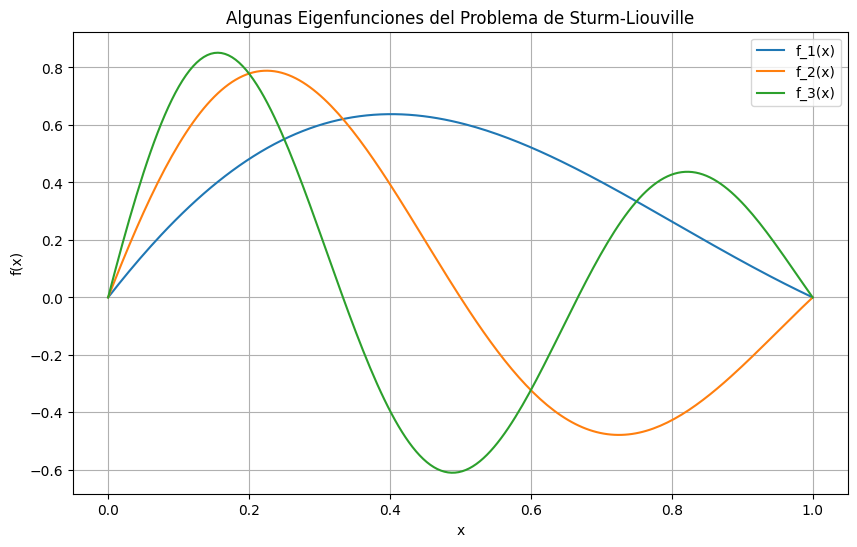

In [15]:
# Graficar las eigenfunciones
x_vals = np.linspace(0, 1, 200)
plt.figure(figsize=(10, 6))
for i, eigenfuncion_sym in enumerate(eigenfunciones):
    eigenfuncion_num = lambdify(x, eigenfuncion_sym, modules=['numpy'])
    plt.plot(x_vals, eigenfuncion_num(x_vals), label=f'f_{n_vals[i]}(x)')

plt.title('Algunas Eigenfunciones del Problema de Sturm-Liouville')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Parte (b) - Expansión en series de Fourier generalizadas
u_sym = exp(-x)
n = symbols('n', integer=True, positive=True)
fn_sym = exp(-x) * sin(n * pi * x)
w_sym = exp(2*x)

Se define la función u(x) = e*, el índice n, la eigenfunción f(x) y la función de peso w(x) = e2*.

Se calculan el numerador y el denominador de la fórmula para los coeficientes c, utilizando integrate.

Se calcula el coeficiente c, dividiendo el numerador por el denominador.

Se muestra una aproximación de la serie de Fourier generalizada mostrando los primeros 5 términos.

In [45]:
# Aproximación de la serie de Fourier generalizada (sumando algunos términos)
num_terms = 5  #cambiar por el num requerido
serie_fourier_sym = sum(cn_sym.subs(n, k) * fn_sym.subs(n, k) for k in range(1, num_terms + 1))
print("\nAproximación de la Serie de Fourier Generalizada (simbólica):", serie_fourier_sym)


Aproximación de la Serie de Fourier Generalizada (simbólica): 4*exp(-x)*sin(pi*x)/pi + 4*exp(-x)*sin(3*pi*x)/(3*pi) + 4*exp(-x)*sin(5*pi*x)/(5*pi)


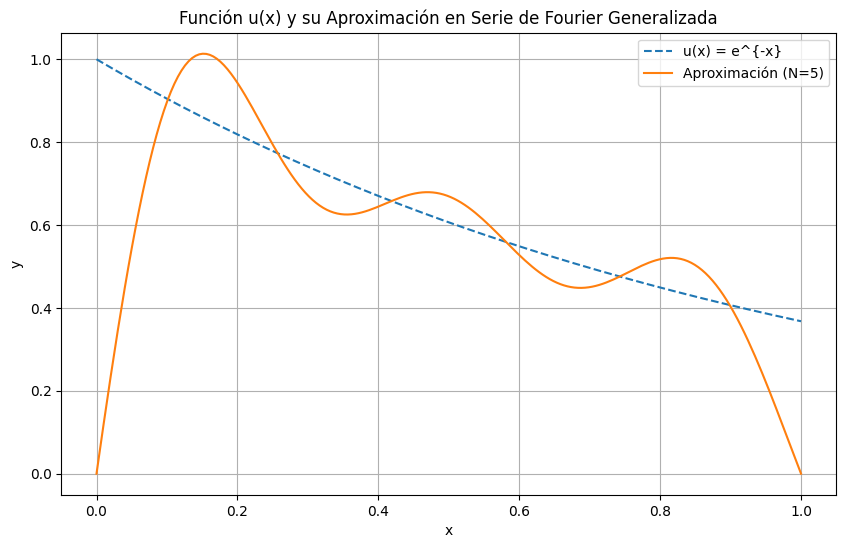

In [46]:
# Graficar la función original y su aproximación en serie de Fourier
u_num = lambdify(x, u_sym, modules=['numpy'])
serie_fourier_num = lambdify(x, serie_fourier_sym, modules=['numpy'])

plt.figure(figsize=(10, 6))
plt.plot(x_vals, u_num(x_vals), label='u(x) = e^{-x}', linestyle='--')
plt.plot(x_vals, serie_fourier_num(x_vals), label=f'Aproximación (N={num_terms})')

plt.title('Función u(x) y su Aproximación en Serie de Fourier Generalizada')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()